In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np

import plotly
import plotly.graph_objs as go
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/StudentsPerformance.csv')
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

In [5]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [12]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


**Data Visualization**

([<matplotlib.patches.Wedge at 0x7f455489d790>,
 [Text(-1.0982417038160106, -0.06217041096298418, 'female'),
  Text(1.0982417038160106, 0.06217041096298404, 'male')],
 [Text(-0.5990409293541875, -0.03391113325253682, '51.8%\n(518)'),
  Text(0.5990409293541875, 0.033911133252536745, '48.2%\n(481)')])

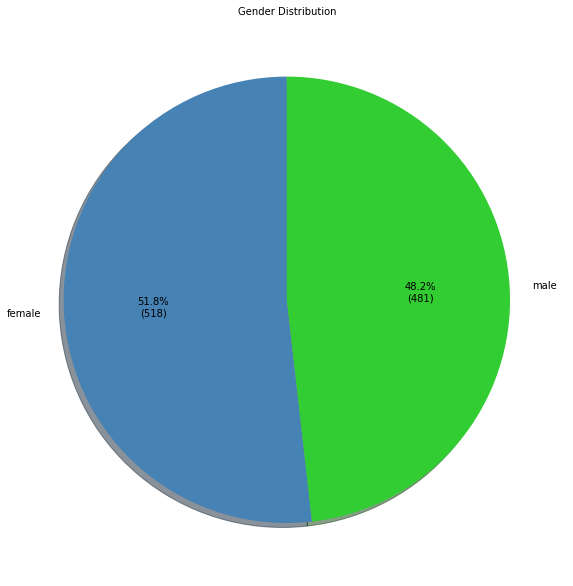

In [14]:
# Showing Gender Wise Distribution

gen_count = data.gender.value_counts()
plt.figure(figsize=(10,16))
plt.title('Gender Distribution',size = 10)

def method(pct,allvalues):
  absolute = int(pct/100*np.sum(allvalues))
  return "{:.1f}%\n({:d})".format(pct,absolute)

plt.pie(gen_count,labels = gen_count.index,autopct = lambda pct: method(pct,gen_count),startangle = 90,colors = ("steelblue","limegreen"),shadow = True)  

In [15]:
# Race Ethenticity 
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

Text(0.5, 1.0, 'No. of race/ethinicty')

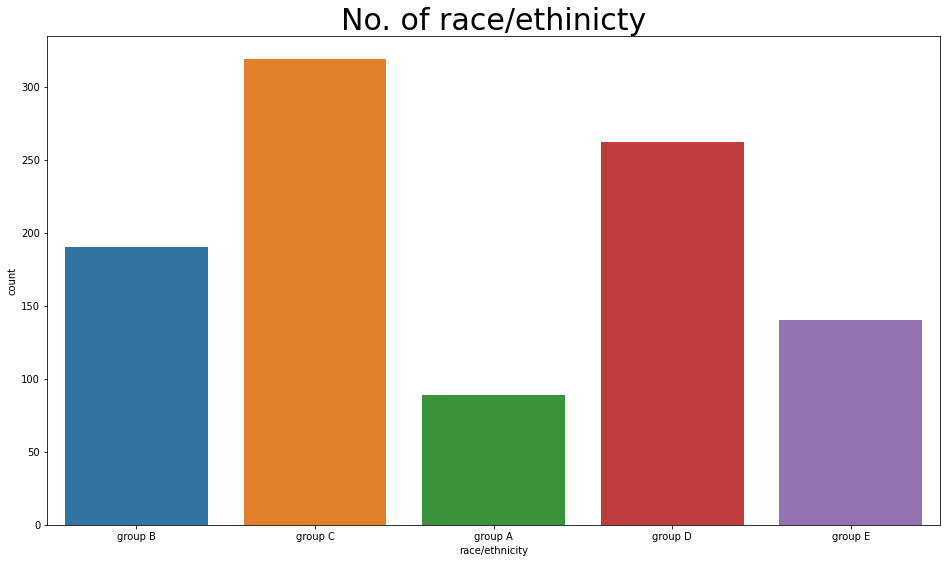

In [16]:
plt.figure(figsize = (16,9))
sns.countplot(data=data,x = 'race/ethnicity')
plt.title("No. of race/ethinicty",size = 30,color = 'black')

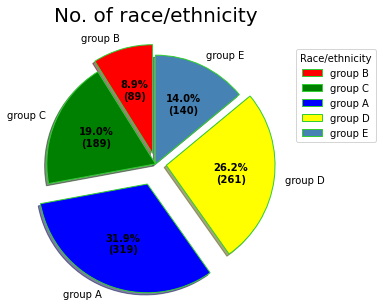

In [17]:
race_eth = data['race/ethnicity'].unique().tolist()
df = data.groupby(['race/ethnicity'])['race/ethnicity'].count().to_frame('Total')
dt = df['Total'].tolist()

explode = (0.1,0.0,0.2,0.1,0.0)
colors = ('red','green','blue','yellow','steelblue')

wp = {'linewidth':1,'edgecolor':'limegreen'}

def fun2(pct,allvalues):
  absolute = int(pct/100*np.sum(allvalues))
  return "{:.1f}%\n({:d})".format(pct,absolute)

fig,ax = plt.subplots(figsize = (10,5))
wedges,texts,autotexts  = ax.pie(df,autopct = lambda pct: fun2(pct,df),explode = explode,labels = race_eth,shadow = True,colors = colors,startangle = 90,wedgeprops = wp,textprops = dict(color = "black"))

ax.legend(wedges,race_eth,title = "Race/ethnicity",loc = 'center left',bbox_to_anchor = (1,0,0.5,1.5))
plt.setp(autotexts,size = 10,weight = "bold")

ax.set_title("No. of race/ethnicity",size = 20)
plt.show()


In [19]:
data['tmp'] = 1
fig = px.pie(data,names = 'race/ethnicity',values = 'tmp',hole = 0.8,title = 'relation tips')
fig.update_traces(textposition = 'outside',textinfo = 'percent+label')
fig.update_layout(title_text = "Group percentage",annotations = [dict(text = 'Group',x = 0.5,y = 0.5,font_size = 20,showarrow = False)])

In [20]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [21]:
def split_multicolumn(col_series):
  result_data = col_series.to_frame()
  options = []
  
  for idx,val in col_series[col_series.notnull()].iteritems():

    for option in val.split(';'):
      if not option in result_data.columns:
        options.append(option)
        result_data[option] = False

      result_data.at[idx,option] = True
  return result_data[options] 
       



In [23]:
parental_level_of_education_data = split_multicolumn(data['parental level of education'])

In [24]:
parental_level_of_education_totals = parental_level_of_education_data.sum().sort_values(ascending = False)
parental_level_of_education_totals

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
dtype: int64

Text(0.5, 0, 'count')

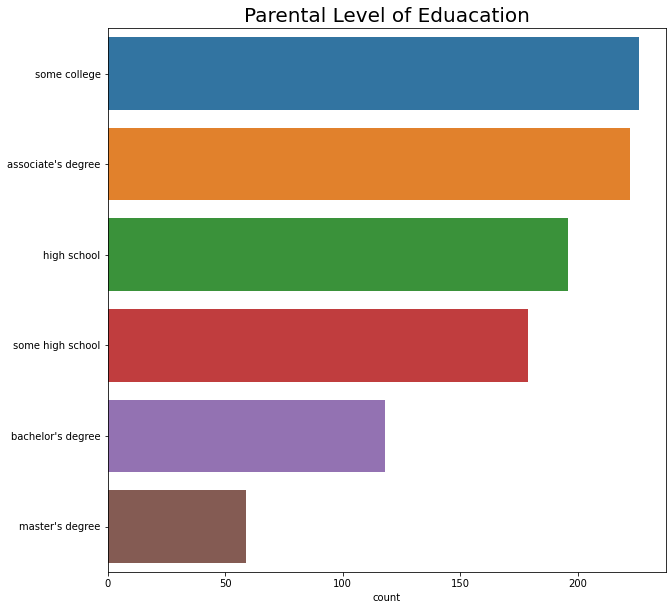

In [25]:
plt.figure(figsize = (10,10))
sns.barplot(x = parental_level_of_education_totals,y = parental_level_of_education_totals.index)
plt.title("Parental Level of Eduacation",size = 20)
plt.xlabel("count")

**Realtionship between Parental Level Education And Scores of Students**

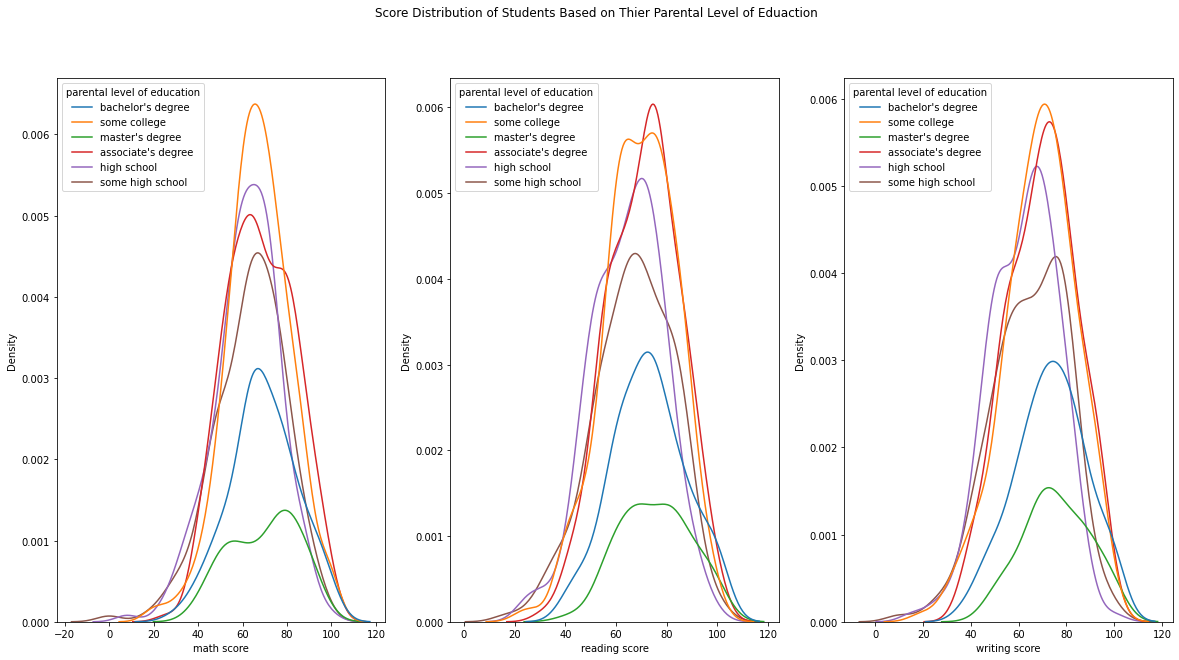

In [26]:
fig, ax = plt.subplots(ncols = 3,figsize = (20,10))

fig.suptitle('Score Distribution of Students Based on Thier Parental Level of Eduaction')

a = sns.kdeplot(data = data,x = 'math score',ax = ax[0],hue = 'parental level of education')

b = sns.kdeplot(data = data,x = 'reading score',ax = ax[1],hue = 'parental level of education')

c = sns.kdeplot(data = data,x = 'writing score',ax = ax[2],hue = 'parental level of education')

sns.move_legend(a, "upper left", bbox_to_anchor=(0,1))
sns.move_legend(b, "upper left", bbox_to_anchor=(0,1))
sns.move_legend(c, "upper left", bbox_to_anchor=(0,1))
